In [1]:
%pylab inline

#import networkx as nx
import pandas as pd
import numpy as np
#import copy
import itertools
import model
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
#files = glob.glob('data/Hierarchical Average Linkage Randomize/main_article_df_list_*.pickle')
#files = glob.glob('data/Hierarchical Average Linkage/main_article_df_list_*.pickle')
files = glob.glob('data/Hier Avg Link Shuffle/main_article_df_list_*.pickle')
#files = glob.glob('data/30_beliefs/main_article_df_list_*.pickle')
dfs = itertools.chain.from_iterable([pd.read_pickle(f) for f in files])
df = pd.concat(dfs)
df.shape

(45000, 20)

In [3]:
means = df.groupby(level=0).aggregate('mean')
# have to cast as type 'float64', because for some reason some of the columns are type 'object'.
means.T

,0,1,2,3,4,5,6,7,8,9
RF top decile similarity,0.077650,0.139139,0.227215,0.332600,0.400610,0.430578,0.441905,0.446071,0.447626,0.448185
RF bottom decile similarity,0.000000,0.008656,0.022022,0.042021,0.065050,0.084039,0.094711,0.099440,0.101356,0.102128
RF num social clusters,15.506667,14.838000,13.652222,12.898000,12.729556,12.866000,12.915333,12.980889,12.992889,12.999556
RF prominence of social clusters,0.049510,0.094693,0.124081,0.131839,0.135294,0.138821,0.142268,0.143380,0.144164,0.144372
RF susceptibility,14.414360,21.489158,30.839732,39.545185,44.220977,46.011774,46.635719,46.857244,46.941852,46.974293
RF diffusion,6.343778,9.588635,14.840494,23.129182,30.547371,34.633468,36.342396,36.988253,37.226792,37.313399
RF top decile clustering,0.070128,0.126649,0.216196,0.307950,0.362268,0.385411,0.397384,0.399543,0.400993,0.401712
RF num semantic clusters,5.026444,4.086000,2.995778,2.345778,2.079556,1.973778,1.960889,1.954889,1.956667,1.954222
Rand top decile similarity,0.077641,0.108477,0.163210,0.260427,0.331013,0.362367,0.374170,0.378537,0.380228,0.380808
Rand bottom decile similarity,0.000000,0.012421,0.035418,0.063303,0.088244,0.107451,0.118387,0.123113,0.125147,0.125895


# Aggregated Fig 2

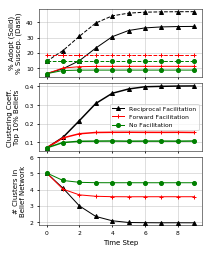

In [23]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["font.size"] = 8
plt.rcParams["lines.markersize"] = 4

plt.figure(figsize=((7.25-4.5),(3.37)))



ax1 = plt.subplot(311)
means['RF diffusion'].plot(color='k', linewidth=1, marker='^')
means['RF susceptibility'].plot(color='k', linewidth=1, marker='^', linestyle='--')

means['FF diffusion'].plot(color='r', linewidth=1, marker='+')
means['FF susceptibility'].plot(color='r', linewidth=1, marker='+', linestyle='--')

means['NF diffusion'].plot(color='g', linewidth=1, marker='o')
means['NF susceptibility'].plot(color='g', linewidth=1, marker='o', linestyle='--')

plt.grid('on', alpha=.5)
plt.ylabel('% Adopt (Solid)\n% Suscep. (Dash)', fontsize=7)
plt.tick_params(length=2, labelbottom=False, labelsize=6)
plt.setp(ax1.spines.values(), linewidth=.5)

ax2 = plt.subplot(312)
means['RF top decile clustering'].plot(marker='^', color='k')
means['FF top decile clustering'].plot(marker='+', color='r')
means['NF top decile clustering'].plot(marker='o', color='g')
plt.tick_params(length=2, labelbottom=False, labelsize=6)
plt.ylabel('Clustering Coeff.\nTop 10% Beliefs', fontsize=7)
plt.grid('on', alpha=.5)

dummies = plt.plot([], [], ls='-', c='k', linewidth=1, marker='^') + \
          plt.plot([], [], ls='-', c='r', linewidth=1, marker='+') + \
          plt.plot([], [], ls='-', c='g', linewidth=1, marker='o')
labels = ['Reciprocal Facilitation', 'Forward Facilitation', 'No Facilitation']
plt.legend(dummies, labels, framealpha=.75, fancybox=True, fontsize=6)
plt.setp(ax2.spines.values(), linewidth=.5)


ax3 = plt.subplot(313)
means['RF num semantic clusters'].plot(marker='^', linewidth=1, color='k')
means['FF num semantic clusters'].plot(marker='+', linewidth=1, color='r')
means['NF num semantic clusters'].plot(marker='o', linewidth=1, color='g')
plt.ylabel('# Clusters in\nBelief Network', fontsize=7)
plt.grid('on', alpha=.5)
plt.xlabel('Time Step', fontsize=7)
plt.yticks([2,3,4,5,6]);
plt.tick_params(length=2, labelsize=6)
plt.setp(ax3.spines.values(), linewidth=.5)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0)

plt.savefig('figS06 reciprocal facilitation.svg')
plt.savefig('figS06 reciprocal facilitation.png',bbox_inches='tight', dpi=150)

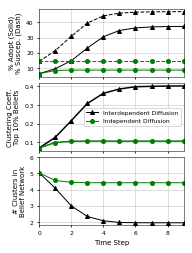

In [13]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["font.size"] = 8
plt.rcParams["lines.markersize"] = 4

plt.figure(figsize=((2.5),(3.37)))



ax1 = plt.subplot(311)
means['RF diffusion'].plot(color='k', linewidth=1, marker='^')
means['RF susceptibility'].plot(color='k', linewidth=1, marker='^', linestyle='--')

# means['FF diffusion'].plot(color='g', linewidth=1, marker='o')
# means['FF susceptibility'].plot(color='g', linewidth=1, marker='o', linestyle='--')

means['NF diffusion'].plot(color='g', linewidth=1, marker='o')
means['NF susceptibility'].plot(color='g', linewidth=1, marker='o', linestyle='--')
plt.grid('on', alpha=.5)
plt.ylabel('% Adopt (Solid)\n% Suscep. (Dash)', fontsize=7)
plt.tick_params(length=2, labelbottom=False, labelsize=6)
plt.setp(ax1.spines.values(), linewidth=.5)

ax2 = plt.subplot(312)
means['RF top decile clustering'].plot(marker='^', color='k')
# means['FF top decile clustering'].plot(marker='o', color='g')
means['NF top decile clustering'].plot(marker='o', color='g')
plt.tick_params(length=2, labelbottom=False, labelsize=6)
plt.ylabel('Clustering Coeff.\nTop 10% Beliefs', fontsize=7)
plt.grid('on', alpha=.5)
dummies = plt.plot([], [], ls='-', c='k', linewidth=1, marker='^') + \
          plt.plot([], [], ls='-', c='g', linewidth=1, marker='o')

# dummies = plt.plot([], [], ls='-', c='k', linewidth=1, marker='s') + \
#           plt.plot([], [], ls='-', c='g', linewidth=1, marker='o') + \
#           plt.plot([], [], ls='-', c='r', linewidth=1, marker='^')
# labels = ['Reciprocal Facilitation', 'Forward Facilitation', 'No Facilitation']
labels = ['Interdependent Diffusion', 'Independent Diffusion']
plt.legend(dummies, labels, framealpha=.75, fancybox=True, fontsize=6)
plt.setp(ax2.spines.values(), linewidth=.5)


ax3 = plt.subplot(313)
means['RF num semantic clusters'].plot(marker='^', linewidth=1, color='k')
#means['FF num semantic clusters'].plot(marker='o', linewidth=1, color='g')
means['NF num semantic clusters'].plot(marker='o', linewidth=1, color='g')
plt.ylabel('# Clusters in\nBelief Network', fontsize=7)
plt.grid('on', alpha=.5)
plt.xlabel('Time Step', fontsize=7)
plt.yticks([2,3,4,5,6]);
plt.tick_params(length=2, labelsize=6)
plt.setp(ax3.spines.values(), linewidth=.5)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0)

plt.savefig('fig2A reciprocal facilitation2.svg')
plt.savefig('fig2A reciprocal facilitation2.png',bbox_inches='tight', dpi=150)

# Aggregated Fig 3

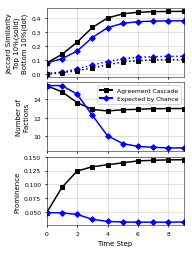

In [11]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams["font.size"] = 8
plt.rcParams["lines.markersize"] = 4

fig = plt.figure(figsize=((2.5),(3.37)))

ax1 = fig.add_subplot(311)
means['Rand top decile similarity'].plot(marker='D', color='b')
means['RF top decile similarity'].plot(marker='s', color='k')
means['Rand bottom decile similarity'].plot(marker='D', color='b', ls=':')
means['RF bottom decile similarity'].plot(marker='s', color='k', ls=':')

plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=6)
plt.ylabel('Jaccard Similarity\nTop 10%(solid)\nBottom 10%(dot)', fontsize=7)
plt.setp(ax1.spines.values(), linewidth=.5)

ax2 = fig.add_subplot(312)
means['RF num social clusters'].plot(marker='s', color='k')
means['Rand num social clusters'].plot(marker='D', color='b')
plt.ylabel('Number of\nFactions', fontsize=7)
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=6)

dummies = plt.plot([], [], ls='-', c='k', linewidth=2, marker='s') + \
          plt.plot([], [], ls='-', c='b', linewidth=2, marker='D')
labels = ['Agreement Cascade', 'Expected by Chance']
plt.legend(dummies, labels, framealpha=.75, fancybox=True, fontsize=6)
plt.setp(ax2.spines.values(), linewidth=.5)

ax3 = fig.add_subplot(313)
means['RF prominence of social clusters'].plot(marker='s', color='k')
means['Rand prominence of social clusters'].plot(marker='D', color='b')
plt.ylabel('Prominence', fontsize=7)
plt.xlabel('Time Step', fontsize=7)
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelsize=6)
plt.setp(ax3.spines.values(), linewidth=.5)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0)
plt.savefig('fig3A agreement cascade.svg')
plt.savefig('fig3A agreement cascade.png',bbox_inches='tight', dpi=150)

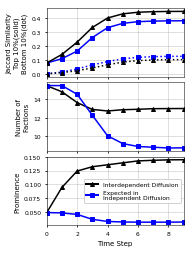

In [12]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams["font.size"] = 8
plt.rcParams["lines.markersize"] = 4

fig = plt.figure(figsize=((2.5),(3.37)))

ax1 = fig.add_subplot(311)
means['Rand top decile similarity'].plot(marker='s', color='b')
means['RF top decile similarity'].plot(marker='^', color='k')
means['Rand bottom decile similarity'].plot(marker='s', color='b', ls=':')
means['RF bottom decile similarity'].plot(marker='^', color='k', ls=':')

plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=6)
plt.ylabel('Jaccard Similarity\nTop 10%(solid)\nBottom 10%(dot)', fontsize=7)
plt.setp(ax1.spines.values(), linewidth=.5)

ax2 = fig.add_subplot(312)
means['RF num social clusters'].plot(marker='^', color='k')
means['Rand num social clusters'].plot(marker='s', color='b')
plt.ylabel('Number of\nFactions', fontsize=7)
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=6)




ax3 = fig.add_subplot(313)
means['RF prominence of social clusters'].plot(marker='^', color='k')
means['Rand prominence of social clusters'].plot(marker='s', color='b')
plt.ylabel('Prominence', fontsize=7)
plt.xlabel('Time Step', fontsize=7)
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelsize=6)
plt.setp(ax3.spines.values(), linewidth=.5)

dummies = plt.plot([], [], ls='-', c='k', linewidth=2, marker='^') + \
          plt.plot([], [], ls='-', c='b', linewidth=2, marker='s')
labels = ['Interdependent Diffusion', "Expected in\nIndependent Diffusion"]
plt.legend(dummies, labels, framealpha=.9, fancybox=True, fontsize=6, loc='center right')
plt.setp(ax2.spines.values(), linewidth=.5)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=0)
plt.savefig('fig3A agreement cascade2.svg')
plt.savefig('fig3A agreement cascade2.png',bbox_inches='tight', dpi=150)

# for presentations


/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


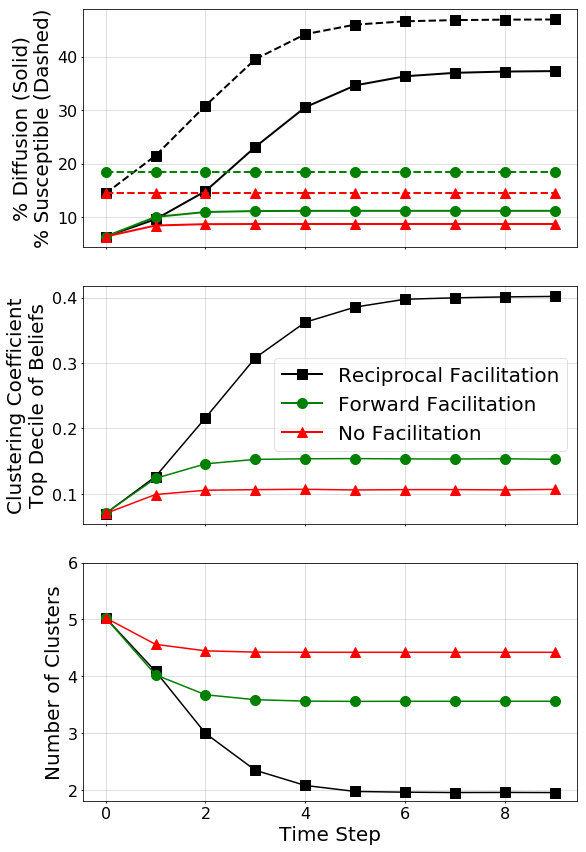

In [6]:
plt.rcParams["font.family"] = "san-serif"
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["font.size"] = 20
plt.rcParams["lines.markersize"] = 10


plt.figure(figsize=(8,12))

plt.subplot(311)
means['RF diffusion'].plot(color='k', linewidth=2, marker='s')
means['RF susceptibility'].plot(color='k', linewidth=2, marker='s', linestyle='--')

means['FF diffusion'].plot(color='g', linewidth=2, marker='o')
means['FF susceptibility'].plot(color='g', linewidth=2, marker='o', linestyle='--')

means['NF diffusion'].plot(color='r', linewidth=2, marker='^')
means['NF susceptibility'].plot(color='r', linewidth=2, marker='^', linestyle='--')

plt.grid('on', alpha=.5)
plt.ylabel('% Diffusion (Solid)\n% Susceptible (Dashed)')
plt.tick_params(length=2, labelbottom=False, labelsize=16)


ax = plt.subplot(312)
means['RF top decile clustering'].plot(marker='s', color='k')
means['FF top decile clustering'].plot(marker='o', color='g')
means['NF top decile clustering'].plot(marker='^', color='r')
plt.tick_params(length=2, labelbottom=False, labelsize=16)
plt.ylabel('Clustering Coefficient\nTop Decile of Beliefs')
plt.grid('on', alpha=.5)

dummies = ax.plot([], [], ls='-', c='k', linewidth=2, marker='s') + \
          ax.plot([], [], ls='-', c='g', linewidth=2, marker='o') + \
          ax.plot([], [], ls='-', c='r', linewidth=2, marker='^')
labels = ['Reciprocal Facilitation', 'Forward Facilitation', 'No Facilitation']
plt.legend(dummies, labels, framealpha=.6, fancybox=True)


plt.subplot(313)
means['RF num semantic clusters'].plot(marker='s', color='k')
means['FF num semantic clusters'].plot(marker='o', color='g')
means['NF num semantic clusters'].plot(marker='^', color='r')
plt.ylabel('Number of Clusters')
plt.grid('on', alpha=.5)
plt.xlabel('Time Step')
plt.yticks([2,3,4,5,6]);
plt.tick_params(length=2, labelsize=16)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
plt.savefig('Reciprocal Facilitation Presentation Plot.svg')

/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


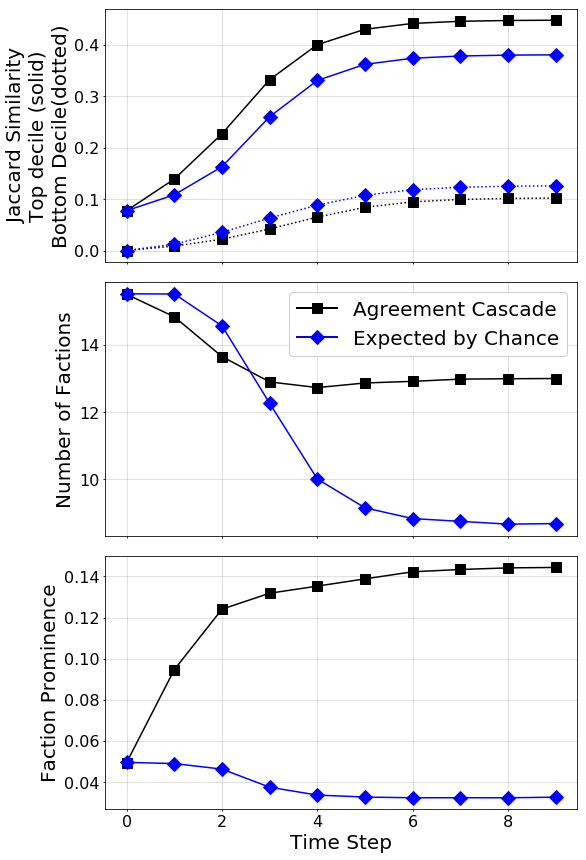

In [7]:
plt.rcParams["font.family"] = "san-serif"
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["font.size"] = 20
plt.rcParams["lines.markersize"] = 10


fig = plt.figure(figsize=(8,12))
fig.add_subplot(311)

means['RF top decile similarity'].plot(marker='s', color='k')
means['Rand top decile similarity'].plot(marker='D', color='b')
means['RF bottom decile similarity'].plot(marker='s', color='k', ls=':')
means['Rand bottom decile similarity'].plot(marker='D', color='b', ls=':')
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=16)
plt.ylabel('Jaccard Similarity\nTop decile (solid)\nBottom Decile(dotted)')


fig.add_subplot(312)
means['RF num social clusters'].plot(marker='s', color='k')
means['Rand num social clusters'].plot(marker='D', color='b')
plt.ylabel('Number of Factions')
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=16)

dummies = plt.plot([], [], ls='-', c='k', linewidth=2, marker='s') + \
          plt.plot([], [], ls='-', c='b', linewidth=2, marker='D')
labels = ['Agreement Cascade', 'Expected by Chance']
plt.legend(dummies, labels, framealpha=1, fancybox=True)


fig.add_subplot(313)
means['RF prominence of social clusters'].plot(marker='s', color='k')
means['Rand prominence of social clusters'].plot(marker='D', color='b')
plt.ylabel('Faction Prominence')
plt.xlabel('Time Step')
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelsize=16)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)
plt.savefig('Agreement Cascade Presentation Plot.svg')

# With standard deviations

In [8]:
stds = df.groupby(level=0).aggregate('std')
stds.T

,0,1,2,3,4,5,6,7,8,9
RF top decile similarity,0.002472,0.006795,0.019680,0.029813,0.028917,0.026737,0.025754,0.025324,0.025115,0.025014
RF bottom decile similarity,0.000000,0.001411,0.003579,0.007788,0.014318,0.019747,0.021991,0.022774,0.022972,0.023001
RF num social clusters,1.124877,1.218595,1.318456,1.431722,1.409480,1.405242,1.385533,1.365139,1.380151,1.371607
RF prominence of social clusters,0.005526,0.011807,0.017371,0.020653,0.021065,0.021380,0.021531,0.021594,0.021850,0.021901
RF susceptibility,0.201247,0.851542,2.108583,2.583074,2.455376,2.313311,2.239727,2.201237,2.181855,2.175409
RF diffusion,0.083795,0.315311,1.251632,2.480804,2.980051,2.989462,2.940916,2.906970,2.883289,2.871804
RF top decile clustering,0.046967,0.059851,0.082567,0.100505,0.107423,0.109648,0.108237,0.108458,0.109024,0.108364
RF num semantic clusters,1.362001,1.183509,1.008182,0.871618,0.807764,0.789589,0.791867,0.791127,0.790383,0.792352
Rand top decile similarity,0.002480,0.003871,0.015581,0.030114,0.030748,0.028807,0.027865,0.027470,0.027397,0.027237
Rand bottom decile similarity,0.000000,0.001963,0.005434,0.009705,0.016140,0.022146,0.024833,0.025742,0.026051,0.026026


/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


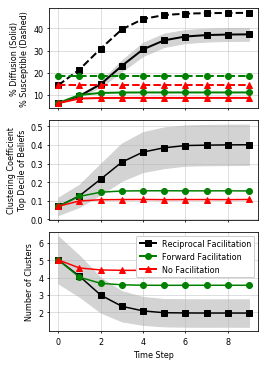

In [9]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["font.size"] = 8
plt.rcParams["lines.markersize"] = 6


plt.figure(figsize=(3.54,5))

plt.subplot(311)
means['RF diffusion'].plot(color='k', linewidth=2, marker='s')
plt.fill_between(means.index, 
                 means['RF diffusion'] - stds['RF diffusion'], 
                 means['RF diffusion'] + stds['RF diffusion'],
                 color='lightgrey')

means['RF susceptibility'].plot(color='k', linewidth=2, marker='s', linestyle='--')

means['FF diffusion'].plot(color='g', linewidth=2, marker='o')
means['FF susceptibility'].plot(color='g', linewidth=2, marker='o', linestyle='--')

means['NF diffusion'].plot(color='r', linewidth=2, marker='^')
means['NF susceptibility'].plot(color='r', linewidth=2, marker='^', linestyle='--')

plt.grid('on', alpha=.5)
plt.ylabel('% Diffusion (Solid)\n% Susceptible (Dashed)')
plt.tick_params(length=2, labelbottom=False, labelsize=8)


plt.subplot(312)
means['RF top decile clustering'].plot(marker='s', color='k')
plt.fill_between(means.index, 
                 means['RF top decile clustering'] - stds['RF top decile clustering'], 
                 means['RF top decile clustering'] + stds['RF top decile clustering'],
                 color='lightgrey')

means['FF top decile clustering'].plot(marker='o', color='g')
means['NF top decile clustering'].plot(marker='^', color='r')
plt.tick_params(length=2, labelbottom=False, labelsize=8)
plt.ylabel('Clustering Coefficient\nTop Decile of Beliefs')
plt.grid('on', alpha=.5)



plt.subplot(313)
means['RF num semantic clusters'].plot(marker='s', color='k')
plt.fill_between(means.index, 
                 means['RF num semantic clusters'] - stds['RF num semantic clusters'], 
                 means['RF num semantic clusters'] + stds['RF num semantic clusters'],
                 color='lightgrey')
means['FF num semantic clusters'].plot(marker='o', color='g')
means['NF num semantic clusters'].plot(marker='^', color='r')
plt.ylabel('Number of Clusters')
plt.grid('on', alpha=.5)
plt.xlabel('Time Step')
plt.yticks([2,3,4,5,6]);
plt.tick_params(length=2, labelsize=8)

dummies = plt.plot([], [], ls='-', c='k', linewidth=2, marker='s') + \
          plt.plot([], [], ls='-', c='g', linewidth=2, marker='o') + \
          plt.plot([], [], ls='-', c='r', linewidth=2, marker='^')
labels = ['Reciprocal Facilitation', 'Forward Facilitation', 'No Facilitation']
plt.legend(dummies, labels, loc='upper right', framealpha=1, fancybox=True)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)

/Users/jameshoughton/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


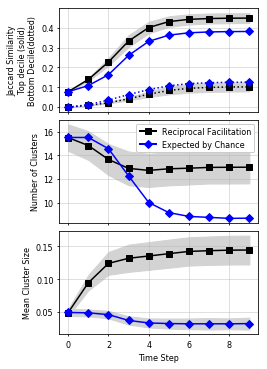

In [10]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams["font.size"] = 8
plt.rcParams["lines.markersize"] = 6

fig = plt.figure(figsize=(3.54,5))
fig.add_subplot(311)

means['RF top decile similarity'].plot(marker='s', color='k')
plt.fill_between(means.index, 
                 means['RF top decile similarity'] - stds['RF top decile similarity'], 
                 means['RF top decile similarity'] + stds['RF top decile similarity'],
                 color='lightgrey')
means['Rand top decile similarity'].plot(marker='D', color='b')
means['RF bottom decile similarity'].plot(marker='s', color='k', ls=':')
plt.fill_between(means.index, 
                 means['RF bottom decile similarity'] - stds['RF bottom decile similarity'], 
                 means['RF bottom decile similarity'] + stds['RF bottom decile similarity'],
                 color='lightgrey')
means['Rand bottom decile similarity'].plot(marker='D', color='b', ls=':')
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=8)
plt.ylabel('Jaccard Similarity\nTop decile (solid)\nBottom Decile(dotted)')


fig.add_subplot(312)
means['RF num social clusters'].plot(marker='s', color='k')
plt.fill_between(means.index, 
                 means['RF num social clusters'] - stds['RF num social clusters'], 
                 means['RF num social clusters'] + stds['RF num social clusters'],
                 color='lightgrey')
means['Rand num social clusters'].plot(marker='D', color='b')
plt.ylabel('Number of Clusters')
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelbottom=False, labelsize=8)

dummies = plt.plot([], [], ls='-', c='k', linewidth=2, marker='s') + \
          plt.plot([], [], ls='-', c='b', linewidth=2, marker='D')
labels = ['Reciprocal Facilitation', 'Expected by Chance']
plt.legend(dummies, labels, framealpha=1, fancybox=True)


fig.add_subplot(313)
means['RF prominence of social clusters'].plot(marker='s', color='k')
plt.fill_between(means.index, 
                 means['RF prominence of social clusters'] - stds['RF prominence of social clusters'], 
                 means['RF prominence of social clusters'] + stds['RF prominence of social clusters'],
                 color='lightgrey')
means['Rand prominence of social clusters'].plot(marker='D', color='b')
plt.fill_between(means.index, 
                 means['Rand prominence of social clusters'] - stds['Rand prominence of social clusters'], 
                 means['Rand prominence of social clusters'] + stds['Rand prominence of social clusters'],
                 color='lightgrey')
plt.ylabel('Mean Cluster Size')
plt.xlabel('Time Step')
plt.grid('on', alpha=.5)
plt.tick_params(length=2, labelsize=8)

plt.tight_layout(pad=0.1, w_pad=0.1, h_pad=.1)